# Demographics


## Imports and data

In [18]:
import pandas as pd

# Load the CSV again, skipping the second header row
df = pd.read_csv("./data/results_all_cleaned.csv", skiprows=[1])

# Split dataset into groups
prolific_df = df[df["Q0_ProlificID"].notna()]
infodienst_df = df[df["Q0_ProlificID"].isna()]


## Number of participants

In [19]:
# Count the number of participants in each group
count_all = df["Q35"].count()
count_prolific = prolific_df["Q35"].count()
count_infodienst = infodienst_df["Q35"].count()

# Format the output
participant_counts = (
    f"Total: {count_all} participants\n"
    f"Prolific {count_prolific} participants\n"
    f"Infodienst: {count_infodienst} participants"
)
print(participant_counts)


Total: 255 participants
Prolific 203 participants
Infodienst: 52 participants


## Age

In [20]:
# Ensure age column is numeric
df["Q35"] = pd.to_numeric(df["Q35"], errors="coerce")

# Define a function to calculate median age
def get_median_age(subset):
    return subset["Q35"].median()

# Split dataset into groups
prolific_df = df[df["Q0_ProlificID"].notna()]
infodienst_df = df[df["Q0_ProlificID"].isna()]

# Compute medians
median_age_prolific = get_median_age(prolific_df)
median_age_infodienst = get_median_age(infodienst_df)
median_age_all = get_median_age(df)

# Output results
comparison_result = (
    f"Median age: {median_age_all:.0f} years\n"
    f"Median age (Prolific): {median_age_prolific:.0f} years\n"
    f"Median age (Infodienst): {median_age_infodienst:.0f} years"
)
print(comparison_result)


Median age: 32 years
Median age (Prolific): 34 years
Median age (Infodienst): 26 years


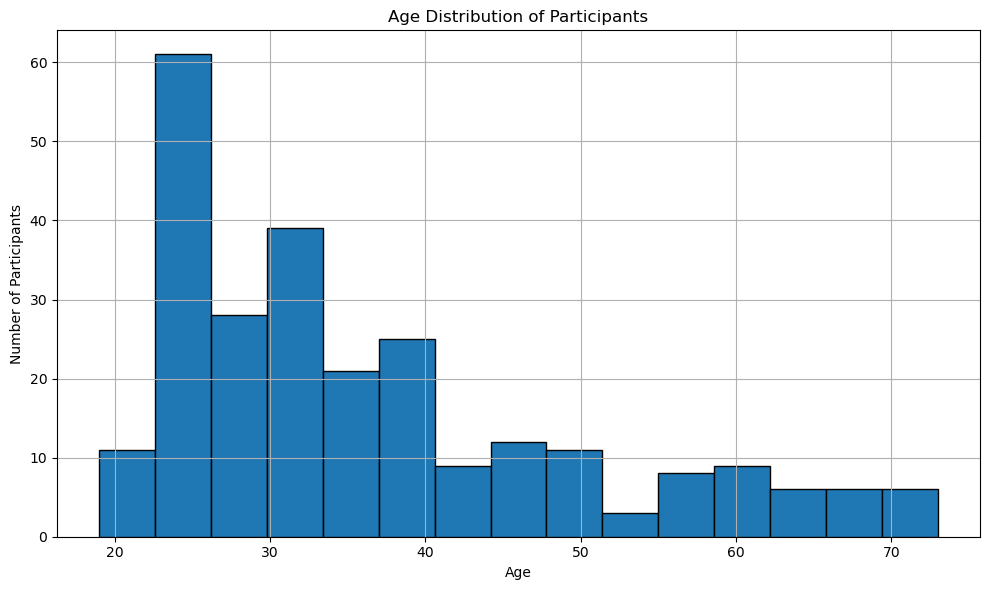

In [21]:
import matplotlib.pyplot as plt

# Drop missing or invalid age entries
valid_ages = df["Q35"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_ages, bins=15, edgecolor='black')
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.grid(True)
plt.tight_layout()
plt.show()


## Gender

Q36_clean
male                    50.980392
female                  47.058824
prefer not to answer     1.176471
non-binary               0.784314
Name: count, dtype: float64


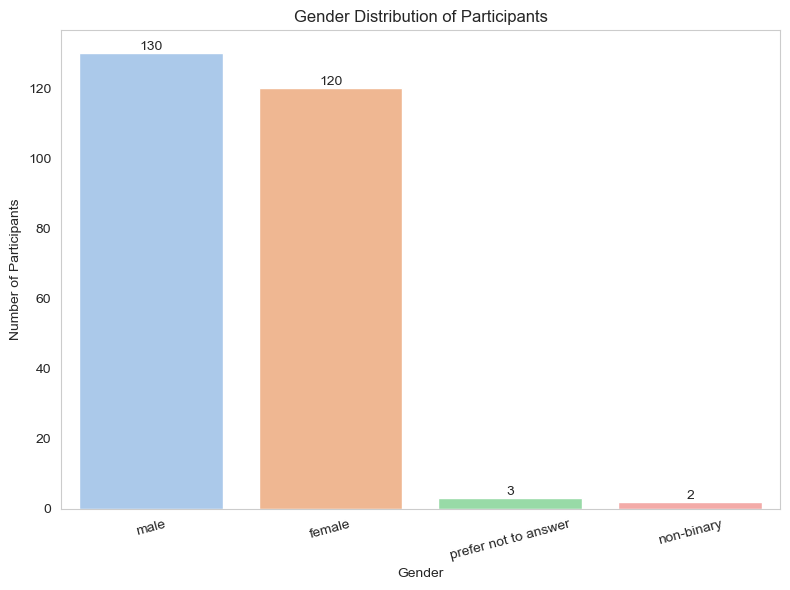

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and standardize the gender column
df["Q36_clean"] = df["Q36"].str.strip().str.lower()

# Count gender distribution
gender_counts = df["Q36_clean"].value_counts()

total_participants = gender_counts.sum()
gender_percentages = (gender_counts / total_participants) * 100

print(gender_percentages)

# Corrected version without the unsupported 'legend' argument
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Q36_clean", hue="Q36_clean", palette="pastel")

for container in ax.containers:
    ax.bar_label(container, padding=0)

plt.title("Gender Distribution of Participants")
plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


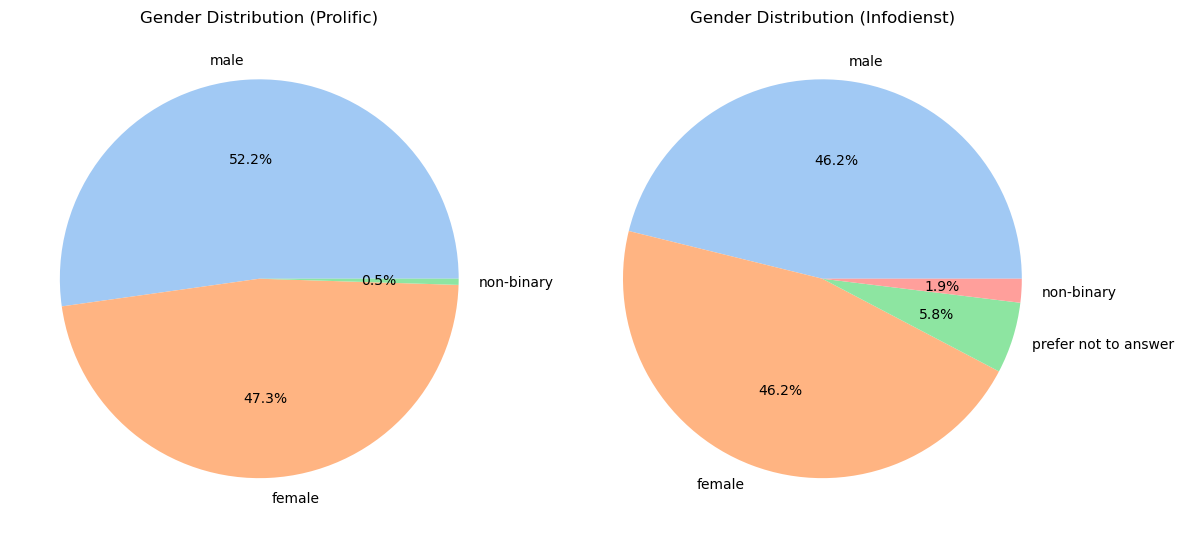

In [23]:
# Prepare gender counts per source
prolific_gender_counts = prolific_df["Q36"].str.strip().str.lower().value_counts()
infodienst_gender_counts = infodienst_df["Q36"].str.strip().str.lower().value_counts()

# Plot side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Prolific pie chart
axes[0].pie(prolific_gender_counts, labels=prolific_gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[0].set_title("Gender Distribution (Prolific)")

# Infodienst pie chart
axes[1].pie(infodienst_gender_counts, labels=infodienst_gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1].set_title("Gender Distribution (Infodienst)")

plt.tight_layout()
plt.show()
